In [1]:
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install seaborn
#!pip install matplotlib
#!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk


In [3]:
data_us=pd.read_csv('D:\\wallpapers and photos\\csv\\usacounty_dataset.csv')

data_us

,county,state,founded,largest_city,pop_total,pop_den,total_area,land_area,water_area
0,Autauga County,Alabama,"November 21, 1818",Prattville,"58,805",97/sq mi (38/km,"604 sq mi (1,560 km","594 sq mi (1,540 km",10 sq mi (30 km
1,Chilton County,Alabama,"December 30, 1868",Clanton,"45,014",64/sq mi (25/km,"701 sq mi (1,820 km","693 sq mi (1,790 km",7.9 sq mi (20 km
2,Conecuh County,Alabama,"February 13, 1818",Evergreen,"11,597",14/sq mi (5.2/km,"853 sq mi (2,210 km","850 sq mi (2,200 km",2.6 sq mi (7 km
3,Barbour County,Alabama,"December 18, 1832",Eufaula,"25,223",28/sq mi (11/km,"905 sq mi (2,340 km","885 sq mi (2,290 km",20 sq mi (50 km
4,Bullock County,Alabama,"December 5 (created), 1866",Union Springs,"10,357",17/sq mi (6.4/km,"625 sq mi (1,620 km","623 sq mi (1,610 km",2.3 sq mi (6 km
...,...,...,...,...,...,...,...,...,...
3240,Lewis County,West Virginia,"December 18, 1816",Weston,"17,033",44/sq mi (17/km,"390 sq mi (1,000 km","385 sq mi (1,000 km",4.8 sq mi (12 km
3241,Lincoln County,West Virginia,"February 23, 1867",NaN,"20,463",47/sq mi (18/km,"439 sq mi (1,140 km","437 sq mi (1,130 km",1.6 sq mi (4 km
3242,Mineral County,West Virginia,"February 1, 1866",Keyser,"26,938",82/sq mi (32/km,329 sq mi (850 km,328 sq mi (850 km,1.4 sq mi (4 km
3243,Jackson County,West Virginia,"March 1, 1831",Ravenswood,"27,791",59/sq mi (23/km,"472 sq mi (1,220 km","464 sq mi (1,200 km",7.3 sq mi (19 km


In [4]:
data_us.head()

,county,state,founded,largest_city,pop_total,pop_den,total_area,land_area,water_area
0,Autauga County,Alabama,"November 21, 1818",Prattville,"58,805",97/sq mi (38/km,"604 sq mi (1,560 km","594 sq mi (1,540 km",10 sq mi (30 km
1,Chilton County,Alabama,"December 30, 1868",Clanton,"45,014",64/sq mi (25/km,"701 sq mi (1,820 km","693 sq mi (1,790 km",7.9 sq mi (20 km
2,Conecuh County,Alabama,"February 13, 1818",Evergreen,"11,597",14/sq mi (5.2/km,"853 sq mi (2,210 km","850 sq mi (2,200 km",2.6 sq mi (7 km
3,Barbour County,Alabama,"December 18, 1832",Eufaula,"25,223",28/sq mi (11/km,"905 sq mi (2,340 km","885 sq mi (2,290 km",20 sq mi (50 km
4,Bullock County,Alabama,"December 5 (created), 1866",Union Springs,"10,357",17/sq mi (6.4/km,"625 sq mi (1,620 km","623 sq mi (1,610 km",2.3 sq mi (6 km


<Axes: >

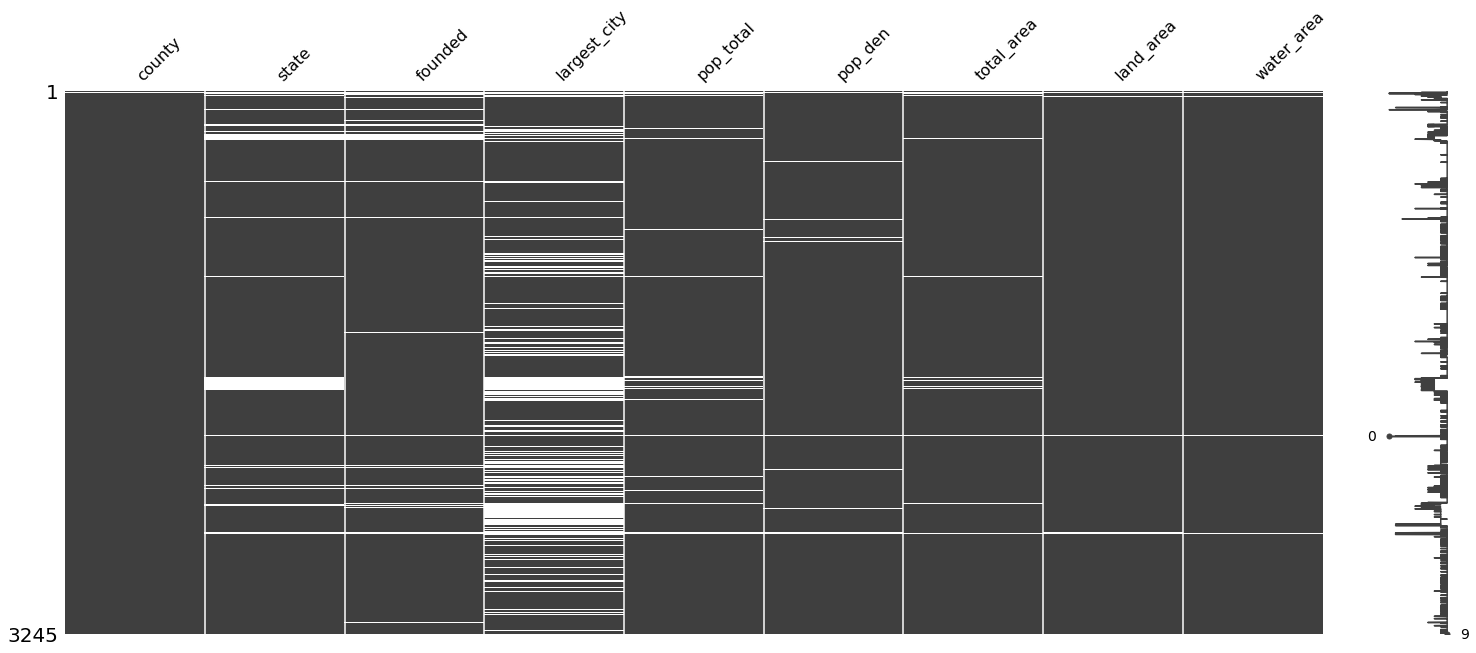

In [5]:
import missingno as miss

miss.matrix(data_us)




<Axes: >

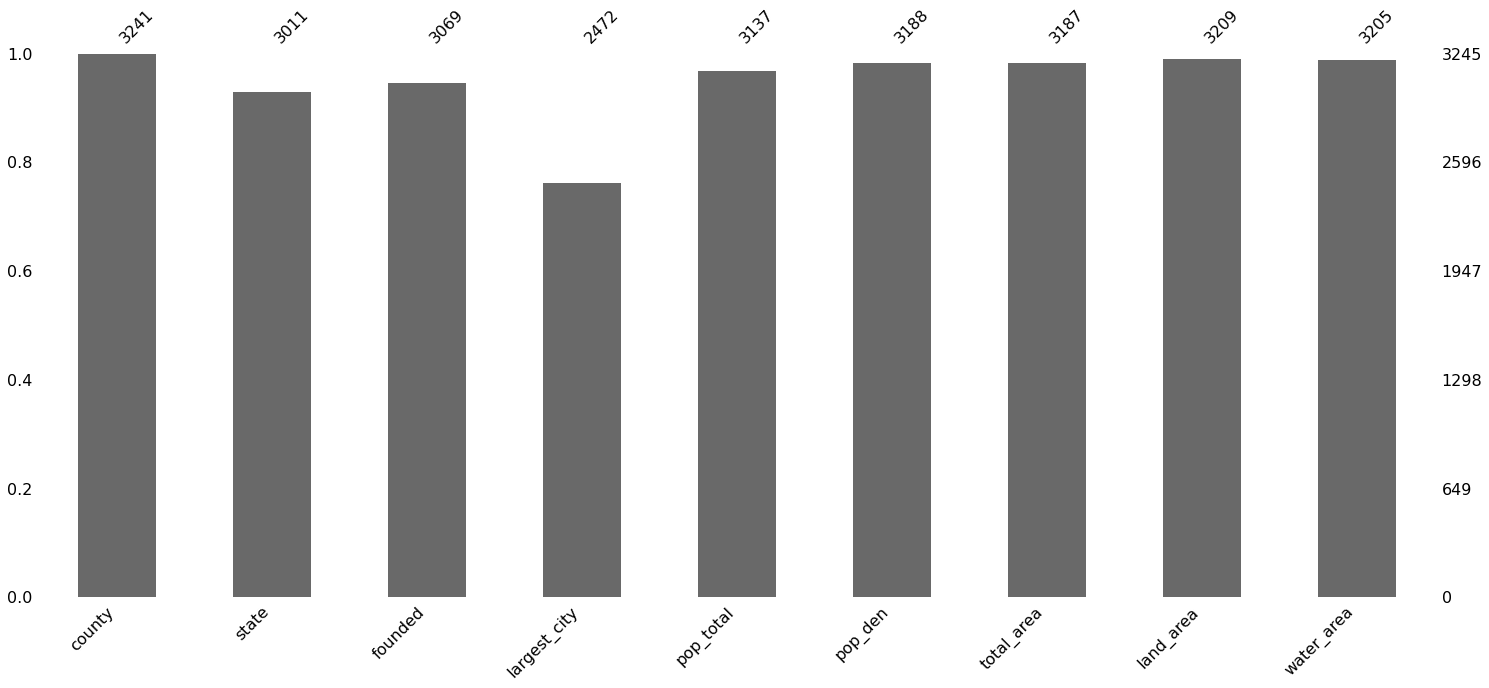

In [6]:
miss.bar(data_us)

In [7]:
data_us[['county','state','largest_city']]

,county,state,largest_city
0,Autauga County,Alabama,Prattville
1,Chilton County,Alabama,Clanton
2,Conecuh County,Alabama,Evergreen
3,Barbour County,Alabama,Eufaula
4,Bullock County,Alabama,Union Springs
...,...,...,...
3240,Lewis County,West Virginia,Weston
3241,Lincoln County,West Virginia,NaN
3242,Mineral County,West Virginia,Keyser
3243,Jackson County,West Virginia,Ravenswood


In [9]:
data_us[["pop_den_sq","pop_den_km"]]=data_us["pop_den"].str.split('\/s...i.\(',expand=True)
data_us[["total_area_sq","total_area_km"]]=data_us["total_area"].str.split(".sq.\w..\(",expand=True)
data_us[["land_area_sq","land_area_km"]]=data_us["land_area"].str.split(".sq.\w..\(",expand=True)
data_us[["water_area_sq","water_area_km"]]=data_us["water_area"].str.split(".sq.\w..\(",expand=True)
data_us["pop_den_km"]=data_us["pop_den_km"].str.replace("/km",'',regex=True)
data_us['total_area_km']=data_us["total_area_km"].str.replace("km",'',regex=True)
data_us["land_area_km"]=data_us["land_area_km"].str.replace("km",'',regex=True)
data_us["water_area_km"]=data_us["water_area_km"].str.replace("km",'',regex=True)

In [18]:
data_us1=data_us.drop(["pop_den","total_area","land_area","water_area","founded"],axis=1).dropna()

In [19]:


pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

display(data_us1)

,county,state,largest_city,pop_total,pop_den_sq,pop_den_km,total_area_sq,total_area_km,land_area_sq,land_area_km,water_area_sq,water_area_km
0,Autauga County,Alabama,Prattville,"58,805",97,38,604,"1,560",594,"1,540",10,30
1,Chilton County,Alabama,Clanton,"45,014",64,25,701,"1,820",693,"1,790",7.9,20
2,Conecuh County,Alabama,Evergreen,"11,597",14,5.2,853,"2,210",850,"2,200",2.6,7
3,Barbour County,Alabama,Eufaula,"25,223",28,11,905,"2,340",885,"2,290",20,50
4,Bullock County,Alabama,Union Springs,"10,357",17,6.4,625,"1,620",623,"1,610",2.3,6
5,Colbert County,Alabama,Muscle Shoals,"57,227",92,36,622,"1,610",593,"1,540",30,80
6,Bibb County,Alabama,Brent,"22,293",36,14,626,"1,620",623,"1,610",3.6,9
7,Blount County,Alabama,Oneonta,"59,134",91,35,651,"1,690",645,"1,670",5.9,15
8,Coffee County,Alabama,Enterprise,"53,465",79,30,680,"1,800",679,"1,760",1.5,4
9,Cherokee County,Alabama,Centre,"24,971",42,16,600,"2,000",554,"1,430",46,120
